# Att rita ett histogram över önskad datamängd

I den här övningen bekantar vi oss med hur datapunkternas mängd inverkar på histogrammet. För undersökningen använde vi den invarianta massan som har behandlats i tidigare övningar. Datan vi använder kommer från mätningar med CERNs CMS-detektor.

### CMS-detektorn

Med LHC-acceleratorn i CERN accelererar man partikelströmmar och låter dem kollidera med varandra. Med hjälp av CMS-detektorn kan man mäta och visa de partiklar som uppstår vid kollisionerna. På bilden nedan kan man se hur CMS-detektorn ser ut när den är öppen.

<img src="https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Kuvat/CMS_avattu.jpg" alt="CMS-ilmaisin avattuna" style="height: 400px">

(Bild: Domenico Salvagnin, https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg)
<br>

### 1) Start

Vi börjar med en kod som tar in de variabler och funktionspaket som vi behöver. Dokumentets kodceller behöver köras i rätt ordning för att fungera. Du kan köra en cell genom att klicka på den och trycka **Ctrl + Enter**.

In [2]:
# Vi hämtar in funktionspaketen först. Pandas läser in datafiler, numpy låter oss göra beräkningar, och
# matplotlib.pyplot låter oss rita grafer. Vi ger paketen kortnamn (pd, np och plt), så kan vi
# lättare använda dem senare.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Vi skapar en ny DataFrame av CMS' mätdata från filen  "Zmumu_Run2011A_massoilla.csv".
# En DataFrame är en tabellvariabel. Ungefär som en excel-fil.
# Vi kallar variabeln "dataset"

dataset = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A_massoilla.csv')

# Vad innehåller filen? Kontrollera genom att skriva ut de 5 första radena av DataFramen
# Minns du hur man gör? Skriv koden här nedan.


In [4]:
# Vi skapar en serie-variabel (som i praktiken är en tabell med bara en kolumn) och kallar den "invariant_massa"
# Vi definierar den som "dataset"-variabelns kolumn 'M'.

invariant_massa = dataset['M']

# Hur många värden finns sparade i variabeln 'invariant_massa'?
# Kan du ta reda på? Skriv koden nedan.


Den här gången vill vi själva välja hur många värden av den invarianta massan som ska användas för att rita histogrammet. Till det här behöver vi skapa en tom tabell, dit vi kan spara den önskade mängden värden.

In [5]:
# Vi skapar en tom tabell 'valda', där vi kan spara den valda mängden datapunkter.
valda = []

### 2) Val av datamängd

Koden nedan frågar användaren hur många mätningar som ska ingå, och sammanställer dem i ett histogram. I detta exempel skapar vi histogrammet på ett annat sätt än tidigare.

Kör koden genom att klicka på kodcellen och trycka **Ctrl + Enter**. Du kan köra om cellen flera gånger och välja olika mängder data.

### Uppgiften

Kontrollera koden. Vad tror du händer om
- du sätter in ett annat värde än ett heltal när cellen ber om en input?
- du sätter in ett värde som är större än antalet tillgängliga datapunkter?
- tar bort **\n** från print-kommandona?

Testa om du trodde rätt.

Undersök hur den valda datamängden påverkar histogrammet.
- Vilka värden på invariant massa verkar vanligast?
- Vad kan du avgöra från den informationen?
- Hur påverkas tolkningen av histogrammet när vi ändrar antalet *bins*?

Ange önskat antal datapunkter: 200

 Du valde 200 mätvärden på invariant massa.


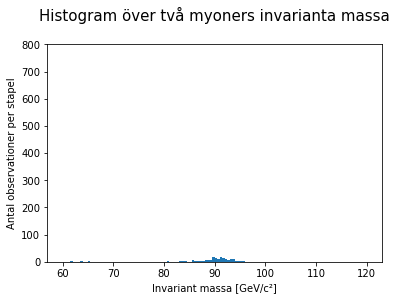

In [10]:
# Vi ber användaren ange antalet värden som ska användas och sparar detta som variabeln 'antal'.
# Koden kräver input-värdet skall vara ett heltal (integer).
antal = int(input('Ange önskat antal datapunkter: '))

# Vi gör en if-sats som kontrollerar variabeln 'antal', och en for-loop som tar rätt mängd element ur tabellen. 
if antal > len(invariant_massa):
    print('''\n Det angivna antalet är större än antalet tillgängliga datapunkter. Ett histogram kunde därför inte skapas.
    Antalet tillgängliga datapunkter är %i.''' % len(invariant_massa))

else:    
    for f in range(antal):
        M = invariant_massa[f]
        valda.append(M)
    print('\n Du valde %i mätvärden på invariant massa.' %(antal))

# Vi använder numpy-paketets histogram-funktion och skapar ett histogram över det valda antalet invarianta massor. 
# Vi namnger histogrammet "histogram1".
histogram1 = np.histogram(valda, bins=120, range=(60,120))


# Vad händer om vi ändrar värdena på parametrarna bins och range?


# Vi färdigställer histogrammet.
# Vi väljer staplarnas bredd och histogrammets mitt.
hist1, bins1 = histogram1
width1 = 1.0*(bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:])/2

# Vi ritar histogrammet med hjälp av matplotlib.pyplot (plt)
plt.bar(center1, hist1, align='center', width=width1)

# Vi namnger koordinataxlarna och ger grafen en titel.
plt.xlabel('Invariant massa [GeV/c²]')
plt.ylabel('Antal observationer per stapel', fontsize=10)
plt.title('Histogram över två myoners invarianta massa\n', fontsize=15)

# Vi låser y-axeln till intervallet 0-800.
axes = plt.gca()
axes.set_ylim([0,800])

# Testa att byta y-axelns visningsintervall. Vad händer om vi inte alls definierar något intervall?
# Du kan hoppa över rader som inte verkar nödvändiga genom att sätta ett #-tecken framför.



# Hur kan du ändra x-axelns intervall?


# Vi återställer listan så att vi ska kunna köra cellen igen.
valda = []